In [37]:
import requests
import pandas as pd
import seaborn as sns
import json
import time
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
with open('default-cards-20220101100237.json', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
year = []
text = []
mana = []
type_line = []
rarity = []
border_color = []
standard = []
modern = []
pioneer = []
legacy = []
vintage = []
colors= []



for i in range(0, len(data)):
    x = 0
    card = data[i]            
    try:        
        card_year =card['released_at'][0:4]
        card_text =len(card['oracle_text'])
        card_mana =card['cmc']
        card_type_line =card['type_line']
        card_rarity = card['rarity']
        card_border_color =card['border_color']
        card_color = ''.join(card['colors'])

        x+=1
        standard.append(True) if card['legalities']['standard'] == 'legal' else standard.append(False)
        modern.append(True) if card['legalities']['standard'] == 'legal' else modern.append(False)       
        pioneer.append(True) if card['legalities']['standard'] == 'legal' else pioneer.append(False)       
        legacy.append(True) if card['legalities']['standard'] == 'legal' else legacy.append(False)     
        vintage.append(True) if card['legalities']['standard'] == 'legal' else vintage.append(False)
        
        year.append(card_year)

        text.append(card_text)

        mana.append(card_mana)

        type_line.append(card_type_line)

        rarity.append(card_rarity)

        border_color.append(card_border_color)
        
        colors.append(card_color)
        
    except:
        print(f'error at {i}: {x}')
        if x >0:
            break

error at 49: 0
error at 53: 0
error at 91: 0
error at 132: 0
error at 155: 0
error at 158: 0
error at 204: 0
error at 332: 0
error at 349: 0
error at 437: 0
error at 481: 0
error at 487: 0
error at 561: 0
error at 575: 0
error at 655: 0
error at 678: 0
error at 705: 0
error at 709: 0
error at 739: 0
error at 807: 0
error at 820: 0
error at 833: 0
error at 876: 0
error at 892: 0
error at 910: 0
error at 930: 0
error at 944: 0
error at 959: 0
error at 969: 0
error at 976: 0
error at 1035: 0
error at 1252: 0
error at 1255: 0
error at 1257: 0
error at 1317: 0
error at 1320: 0
error at 1328: 0
error at 1352: 0
error at 1359: 0
error at 1386: 0
error at 1387: 0
error at 1389: 0
error at 1423: 0
error at 1438: 0
error at 1454: 0
error at 1467: 0
error at 1495: 0
error at 1527: 0
error at 1538: 0
error at 1547: 0
error at 1580: 0
error at 1607: 0
error at 1643: 0
error at 1655: 0
error at 1775: 0
error at 1780: 0
error at 1791: 0
error at 1798: 0
error at 1814: 0
error at 1907: 0
error at 1919

error at 54628: 0
error at 54648: 0
error at 54670: 0
error at 54723: 0
error at 54811: 0
error at 54830: 0
error at 54937: 0
error at 54942: 0
error at 54954: 0
error at 55065: 0
error at 55094: 0
error at 55122: 0
error at 55135: 0
error at 55143: 0
error at 55146: 0
error at 55163: 0
error at 55186: 0
error at 55192: 0
error at 55193: 0
error at 55291: 0
error at 55325: 0
error at 55356: 0
error at 55366: 0
error at 55411: 0
error at 55413: 0
error at 55427: 0
error at 55432: 0
error at 55451: 0
error at 55533: 0
error at 55560: 0
error at 55567: 0
error at 55592: 0
error at 55687: 0
error at 55720: 0
error at 55840: 0
error at 55841: 0
error at 55853: 0
error at 55866: 0
error at 55870: 0
error at 55884: 0
error at 55921: 0
error at 55949: 0
error at 55961: 0
error at 55975: 0
error at 55993: 0
error at 55994: 0
error at 55999: 0
error at 56007: 0
error at 56047: 0
error at 56084: 0
error at 56099: 0
error at 56212: 0
error at 56235: 0
error at 56277: 0
error at 56279: 0
error at 5

In [4]:
df = pd.DataFrame({'Year':year, 'Text':text, 'CMC':mana, 'Type':type_line, 'Rarity':rarity, 'Border Color':border_color, 'Color':colors, 'Standard':standard, 'Modern':modern,'Pioneer':pioneer, 'Legacy':legacy, 'Vintage':vintage})

df

,Year,Text,CMC,Type,Rarity,Border Color,Color,Standard,Modern,Pioneer,Legacy,Vintage
0,2006,40,6.0,Creature — Sliver,uncommon,black,R,False,False,False,False,False
1,2009,118,2.0,Creature — Kor Soldier,common,black,W,False,False,False,False,False
2,2015,6,0.0,Token Creature — Spirit,common,black,W,False,False,False,False,False
3,2017,249,3.0,Creature — Siren Pirate,common,black,U,False,False,False,False,False
4,1994,197,1.0,Enchantment — Aura,rare,white,G,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
63936,2015,162,3.0,Artifact,uncommon,black,,False,False,False,False,False
63937,1997,44,2.0,Instant,common,white,U,False,False,False,False,False
63938,2009,170,0.0,Plane — Luvion,rare,black,,False,False,False,False,False
63939,2003,29,3.0,Creature — Troll,common,white,G,False,False,False,False,False


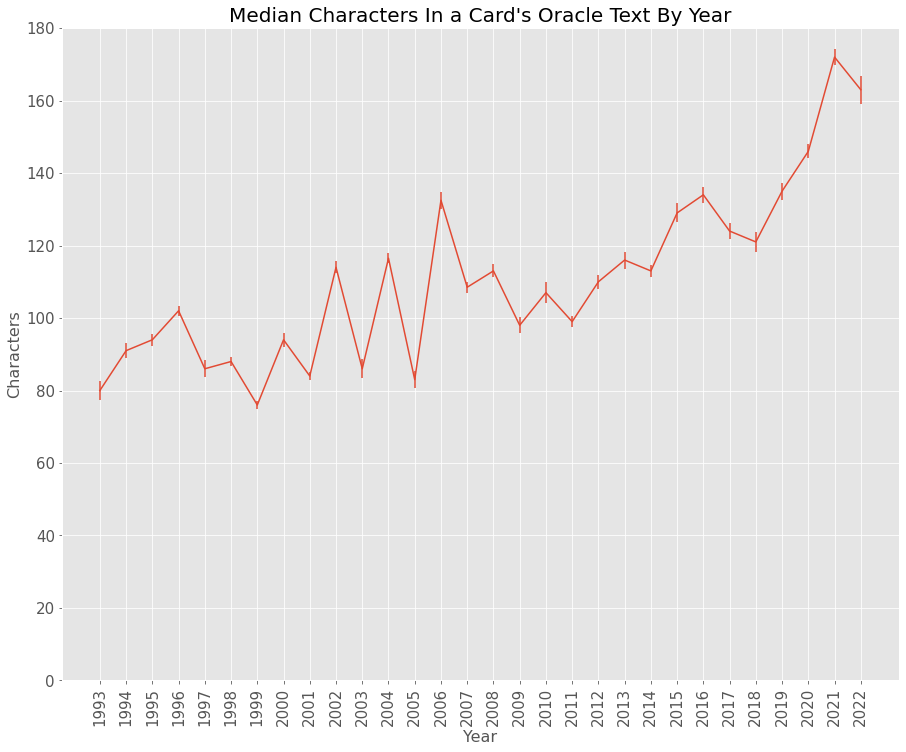

In [55]:
yeardf = df.groupby('Year').median()
err = []

for year in df['Year'].unique():
    err.append(stats.sem(df[df['Year'] == year]['Text']))

yeardf['err'] = err

plt.style.use('ggplot')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

fig, ax = plt.subplots()
fig.set_size_inches([15, 12])
ax.errorbar(yeardf.index, yeardf['Text'], yerr=yeardf['err'])
ax.set_ylim([0,180])
ax.set_title("Median Characters In a Card's Oracle Text By Year", fontsize = 20)
ax.set_ylabel('Characters', fontsize = 16)
ax.set_xlabel('Year', fontsize= 16)



plt.xticks(rotation=90)

plt.show()

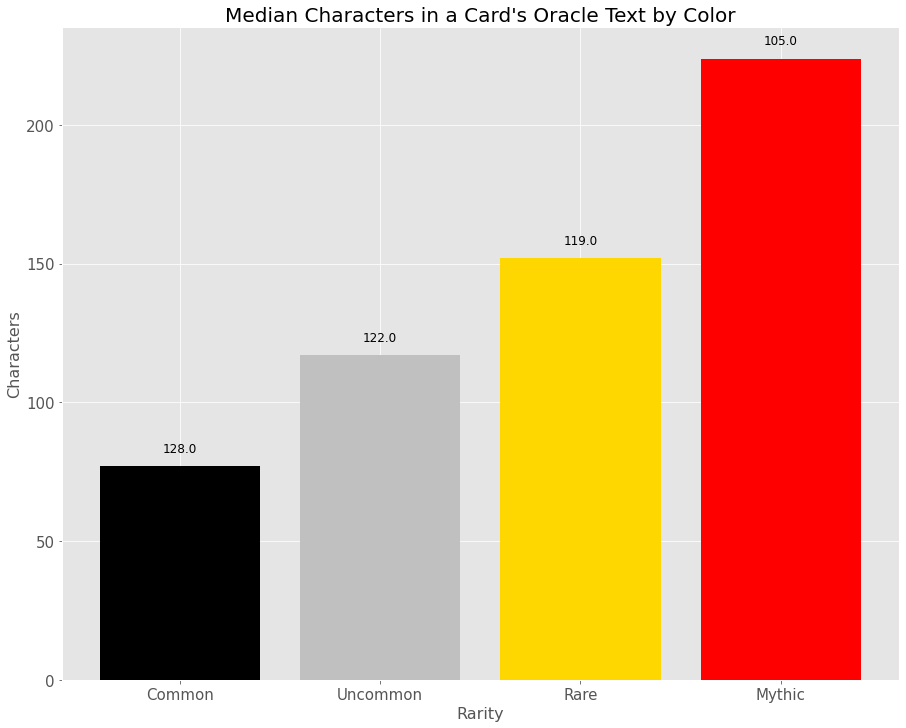

In [85]:
raritydf = df.drop(df[df['Rarity'] == 'bonus' ].index)
raritydf.drop(df[df['Rarity'] == 'special' ].index, inplace=True)
raritydf = raritydf.groupby('Rarity').median()
raritydf = raritydf.reindex(['common', 'uncommon', 'rare', 'mythic'])

fig, ax = plt.subplots()
ax.bar(['Common', 'Uncommon', 'Rare', 'Mythic'], raritydf['Text'], color = ['black', 'silver', 'gold', 'red'])
fig.set_size_inches([15, 12])
ax.set_title("Median Characters in a Card's Oracle Text by Color", fontsize = 20)
ax.set_xlabel('Rarity', fontsize=16)
ax.set_ylabel('Characters', fontsize=16)
for i in range(0, 4):
    plt.text(['Common', 'Uncommon', 'Rare', 'Mythic'][i], raritydf['Text'][i]  + 5, y[i], ha='center', size = 'large')
plt.show()


In [8]:
colordf = df.groupby('Color').median()
colordf.reset_index(inplace = True)
whitedf = colordf[colordf['Color'].str.contains('W')]
bluedf = colordf[colordf['Color'].str.contains('U')]
blackdf = colordf[colordf['Color'].str.contains('B')]
reddf = colordf[colordf['Color'].str.contains('R')]
greendf = colordf[colordf['Color'].str.contains('G')]
colorlessdf = colordf[colordf['Color'] == '']


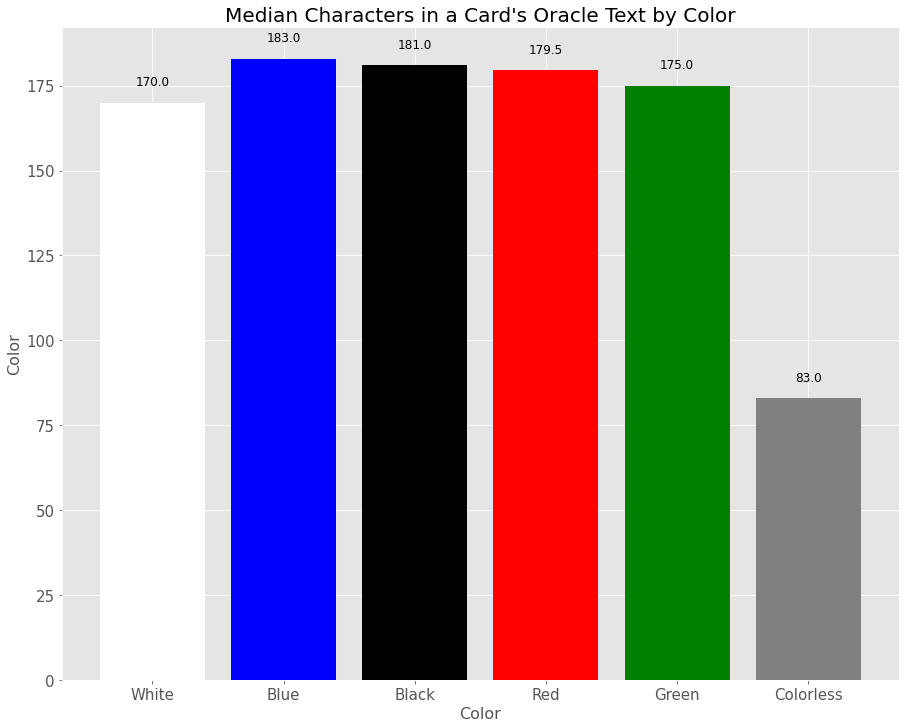

In [83]:
x = ['White', 'Blue', 'Black', 'Red', 'Green', 'Colorless']
y = [whitedf['Text'].median(), bluedf['Text'].median(), blackdf['Text'].median(), reddf['Text'].median(), greendf['Text'].median(), colorlessdf['Text'].median()]

fig, ax = plt.subplots()
ax.bar(x, y, color =['white', 'blue', 'black', 'red', 'green', 'grey'])
fig.set_size_inches([15, 12])
ax.set_title("Median Characters in a Card's Oracle Text by Color", fontsize = 20)
ax.set_xlabel('Color', fontsize = 16)
ax.set_ylabel('Color', fontsize = 16)
for i in range(0, len(y)):
    plt.text(x[i], y[i] + 5, y[i], ha='center', size = 'large')



In [13]:
#creature type, fill each column, add as cols to df, and use those to make the type charts
creature = []
artifact = []
sorcery = []
instant = []
enchantment = []
planeswalker = []
legend = []

for card in df['Type']:
    if 'Creature' in card:
        creature.append(True)
    else:
        creature.append(False)
        
    if 'Artifact' in card:
        artifact.append(True)
    else:
        artifact.append(False)
        
    if 'Sorcery' in card:
        sorcery.append(True)
    else:
        sorcery.append(False)
        
    if 'Instant' in card:
        instant.append(True)
    else:
        instant.append(False)
        
    if 'Enchantment' in card:
        enchantment.append(True)
    else:
        enchantment.append(False)
        
    if 'Planeswalker' in card:
        planeswalker.append(True)
    else:
        planeswalker.append(False)
        
    if 'Legend' in card:
        legend.append(True)
    else:
        legend.append(False)        

In [15]:
df['Creature'] = creature
df['Artifact'] = artifact
df['Sorcery'] = sorcery
df['Instant'] = instant
df['Enchantment'] = enchantment
df['Planeswalker'] = planeswalker
df['Legend'] = legend
df

,Year,Text,CMC,Type,Rarity,Border Color,Color,Standard,Modern,Pioneer,Legacy,Vintage,Creature,Artifact,Sorcery,Instant,Enchantment,Planeswalker,Legend
0,2006,40,6.0,Creature — Sliver,uncommon,black,R,False,False,False,False,False,True,False,False,False,False,False,False
1,2009,118,2.0,Creature — Kor Soldier,common,black,W,False,False,False,False,False,True,False,False,False,False,False,False
2,2015,6,0.0,Token Creature — Spirit,common,black,W,False,False,False,False,False,True,False,False,False,False,False,False
3,2017,249,3.0,Creature — Siren Pirate,common,black,U,False,False,False,False,False,True,False,False,False,False,False,False
4,1994,197,1.0,Enchantment — Aura,rare,white,G,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63936,2015,162,3.0,Artifact,uncommon,black,,False,False,False,False,False,False,True,False,False,False,False,False
63937,1997,44,2.0,Instant,common,white,U,False,False,False,False,False,False,False,False,True,False,False,False
63938,2009,170,0.0,Plane — Luvion,rare,black,,False,False,False,False,False,False,False,False,False,False,False,False
63939,2003,29,3.0,Creature — Troll,common,white,G,False,False,False,False,False,True,False,False,False,False,False,False


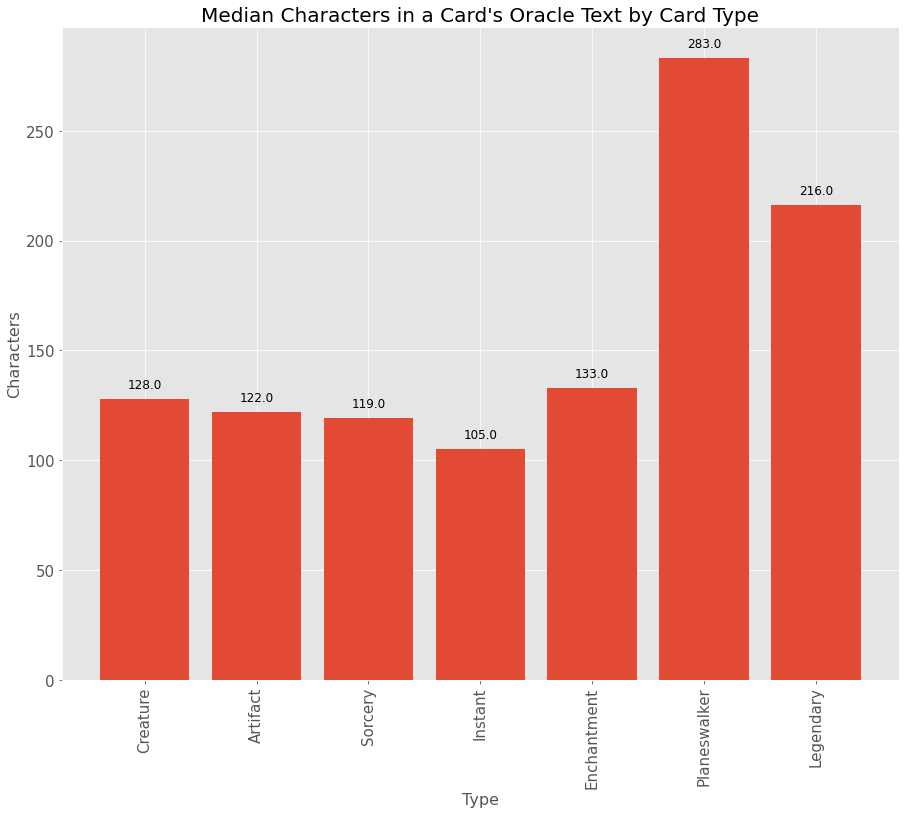

In [84]:
creaturedf = df[df['Creature'] == True]
artifactdf = df[df['Artifact'] == True]
sorcerydf = df[df['Sorcery'] == True]
instantdf = df[df['Instant'] == True]
enchantmentdf = df[df['Enchantment'] == True]
planeswalkerdf = df[df['Planeswalker'] == True]
legenddf = df[df['Legend'] == True]

fig, ax = plt.subplots()
x= ['Creature', 'Artifact', 'Sorcery', 'Instant', 'Enchantment', 'Planeswalker', 'Legendary']
y = [creaturedf['Text'].median(), artifactdf['Text'].median(), sorcerydf['Text'].median(), instantdf['Text'].median(), enchantmentdf['Text'].median(), planeswalkerdf['Text'].median(), legenddf['Text'].median()]
ax.bar(x, y)
plt.xticks(rotation = 90)
fig.set_size_inches([15, 12])
ax.set_title("Median Characters in a Card's Oracle Text by Card Type", fontsize = 20)
ax.set_xlabel('Type', fontsize=16)
ax.set_ylabel('Characters', fontsize=16)
for i in range(0, len(y)):
    plt.text(x[i], y[i] + 5, y[i], ha='center', size = 'large')

In [40]:
yeardf

,Text,CMC,Standard,Modern,Pioneer,Legacy,Vintage,Creature,Artifact,Sorcery,Instant,Enchantment,Planeswalker,Legend,err
Year,,,,,,,,,,,,,,,
1993,80.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
1994,91.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
1995,94.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
1996,102.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
1997,86.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
1998,88.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
1999,76.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
2000,94.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645
2001,84.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.387645


In [32]:
yeardf['err'] = stats.sem(df.groupby('Year')['Text'])

pandas.core.series.Series

[2.5470226629345136,
 2.077479313113603,
 1.599710402103555,
 1.4303811934496558,
 2.3769479297023235,
 1.2658885867414031,
 1.1974196273482471,
 1.994832856654013,
 1.202077445992194,
 1.6897561635194023,
 2.5766224669323647,
 1.436913572351253,
 2.2982646103841042,
 2.4109506614652103,
 1.538070359649061,
 1.791178256572233,
 2.155489539222669,
 2.8656363072170223,
 1.5800732803323,
 1.8803959424788677,
 2.3548238697942763,
 1.5804945160355202,
 2.6293628213358384,
 2.213303607131612,
 2.1775925120383337,
 2.7046689792373195,
 2.388108261837671,
 1.904413553933027,
 2.280136016778495,
 3.8759850353866088]

In [46]:
df['2020']

KeyError: '2020'